# Customer Churn Prediction System

## Problem Statement

Customer churn refers to the situation when customers stop using a company’s product or service.
In highly competitive industries like **telecommunications**, retaining existing customers is
more cost-effective than acquiring new ones.

The objective of this project is to build a **Machine Learning–based Churn Prediction System**
that can identify customers who are likely to leave the service in the future.

By predicting churn in advance, businesses can:
- Take proactive retention actions
- Offer personalized discounts or plans
- Reduce revenue loss
- Improve customer satisfaction

This project is developed as part of **Machine Learning Task 2 – Churn Prediction System**
under the **Future Interns Internship Program**.


## Project Objective

The main goals of this project are:

1. Analyze customer behavior using historical data
2. Perform data cleaning and preprocessing
3. Explore churn patterns using data visualization
4. Build and compare multiple classification models:
   - Logistic Regression
   - Random Forest
   - XGBoost
5. Evaluate models using business-relevant metrics
6. Predict churn probability for each customer
7. Provide actionable business insights for decision-making


## Dataset Overview

The dataset used in this project is the **Telco Customer Churn Dataset**.

Each row in the dataset represents a **single customer**, and each column contains
information related to customer demographics, services used, billing details, and churn status.

### Target Variable
- **Churn**
  - Yes → Customer has left the service
  - No → Customer is still active

This is a **binary classification problem**.


In [197]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [198]:
# Load the Telco Customer Churn dataset
df = pd.read_csv("../data/raw/telco_customer_churn.csv")

# Display first 5 rows
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Understanding the Data Structure

Before performing any analysis or modeling, it is important to understand:

- Number of rows and columns
- Data types of each feature
- Presence of missing values
- Numerical vs categorical variables

This helps us decide the appropriate preprocessing steps.


In [199]:
# Number of rows and columns
df.shape


(7043, 21)

In [200]:
# Dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [201]:
# Statistical summary of numerical columns
df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Key Initial Observations

From the initial exploration, we can observe that:

- The dataset contains both **categorical and numerical** features
- The target variable `Churn` is categorical and needs encoding
- Some columns may contain missing or improperly formatted values
- Features such as tenure, contract type, and monthly charges
  are likely to have a strong relationship with churn

These observations guide the next step: **Data Cleaning & Preprocessing**.


## Data Understanding & Cleaning

Real-world data is rarely clean or ready for machine learning.
Before building any model, we must preprocess the dataset to ensure:

- No missing or invalid values
- All features are in numerical format
- Data is consistent and machine-readable
- Irrelevant columns are removed

This step is crucial because poor data quality leads to poor model performance.


In [202]:
# Check missing values in each column
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Handling Incorrect Data Types

The `TotalCharges` column often appears as an object (text) instead of a numeric value.
This happens because some rows contain blank spaces.

We must convert this column to a numeric format before modeling.


In [203]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Recheck missing values
df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## Handling Missing Values

After conversion, some values in `TotalCharges` become missing.
Since these are numerical values, we replace them with the **median**.

The median is preferred over the mean because it is less affected by outliers.


In [204]:
# Fill missing values using median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Final check
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Dropping Irrelevant Columns

The `customerID` column is a unique identifier.
It does not provide any useful information for predicting churn.

Keeping such columns can confuse the model, so we remove them.


In [205]:
# Drop customerID column
df.drop('customerID', axis=1, inplace=True)


## Encoding the Target Variable

Machine learning models work with numbers, not text.
The target variable `Churn` contains categorical values (`Yes` and `No`).

We convert:
- Yes → 1 (Customer churned)
- No → 0 (Customer retained)


In [206]:
# Encode target variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Verify encoding
df['Churn'].value_counts()


Churn
0    5174
1    1869
Name: count, dtype: int64

## Encoding Categorical Features

Many columns such as `Contract`, `PaymentMethod`, and `InternetService`
are categorical in nature.

We use **One-Hot Encoding** to convert these categorical variables into
numerical format without introducing unintended order.


In [207]:
# Apply one-hot encoding to categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Check the transformed dataset
df_encoded.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False


## Feature Scaling

Numerical features such as `tenure`, `MonthlyCharges`, and `TotalCharges`
are on different scales.

Feature scaling ensures that no single feature dominates the model.
This is especially important for models like Logistic Regression.


In [208]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Initialize scaler
scaler = StandardScaler()

# Scale features
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.439916,-1.277445,-1.160323,-0.994242,-1.009559,1.034530,-0.654012,-3.054010,3.054010,-0.854176,-0.885660,-0.525927,-0.525927,-0.633933,-0.525927,1.378241,-0.525927,-0.723968,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807
1,-0.439916,0.066327,-0.259629,-0.173244,0.990532,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,-0.885660,-0.525927,-0.525927,1.577454,-0.525927,-0.725563,-0.525927,1.381277,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,1.835513
2,-0.439916,-1.236724,-0.362660,-0.959674,0.990532,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,-0.885660,-0.525927,-0.525927,1.577454,-0.525927,1.378241,-0.525927,-0.723968,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,-0.711026,1.835513
3,-0.439916,0.514251,-0.746535,-0.194766,0.990532,-0.966622,-0.654012,-3.054010,3.054010,-0.854176,-0.885660,-0.525927,-0.525927,1.577454,-0.525927,-0.725563,-0.525927,1.381277,-0.525927,1.563872,-0.525927,-0.790132,-0.525927,-0.79607,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,-0.544807
4,-0.439916,-1.236724,0.197365,-0.940470,-1.009559,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,1.129102,-0.525927,-0.525927,-0.633933,-0.525927,-0.725563,-0.525927,-0.723968,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807


## Train-Test Split

To evaluate how well our model performs on unseen data,
we split the dataset into training and testing sets.

- Training set: 80%
- Testing set: 20%

Stratified sampling is used to preserve churn distribution.


In [209]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape


((5634, 30), (1409, 30))

## Data Cleaning Summary

At the end of this step, we have:

- Removed irrelevant columns
- Handled missing values
- Encoded categorical variables
- Scaled numerical features
- Prepared clean training and testing datasets

The data is now ready for **Exploratory Data Analysis (EDA)**.


## Exploratory Data Analysis (EDA)

Exploratory Data Analysis helps us understand:
- How many customers are churning
- Which customer segments churn more
- How pricing, tenure, and contracts affect churn

The insights from this section are critical for business decision-making.


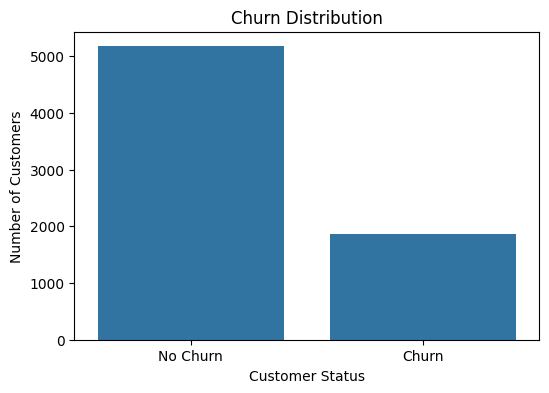

In [210]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.xlabel('Customer Status')
plt.ylabel('Number of Customers')
plt.show()


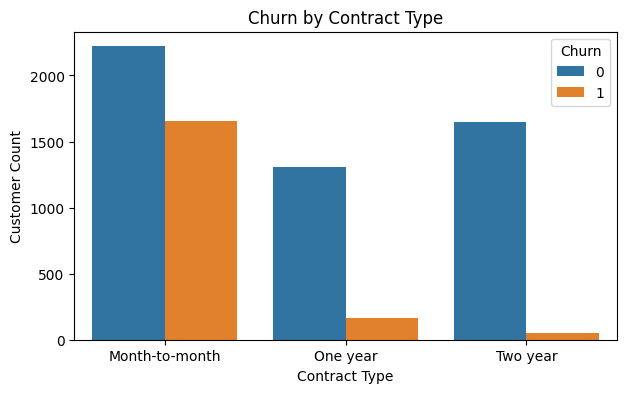

In [211]:
plt.figure(figsize=(7,4))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Customer Count')
plt.legend(title='Churn')
plt.show()


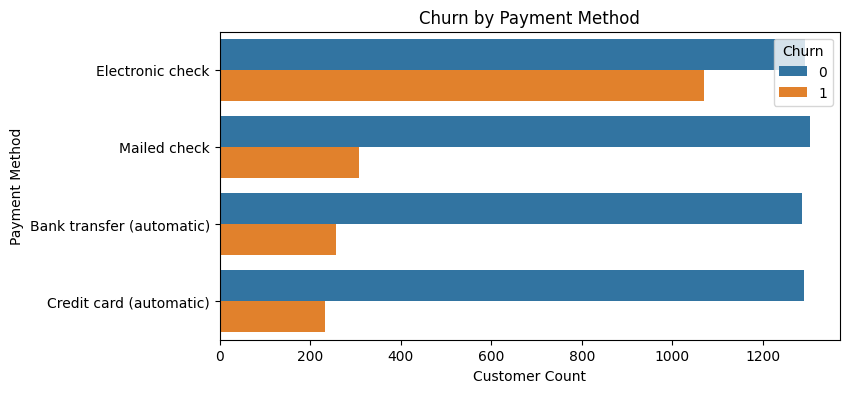

In [212]:
plt.figure(figsize=(8,4))
sns.countplot(y='PaymentMethod', hue='Churn', data=df)
plt.title('Churn by Payment Method')
plt.xlabel('Customer Count')
plt.ylabel('Payment Method')
plt.show()


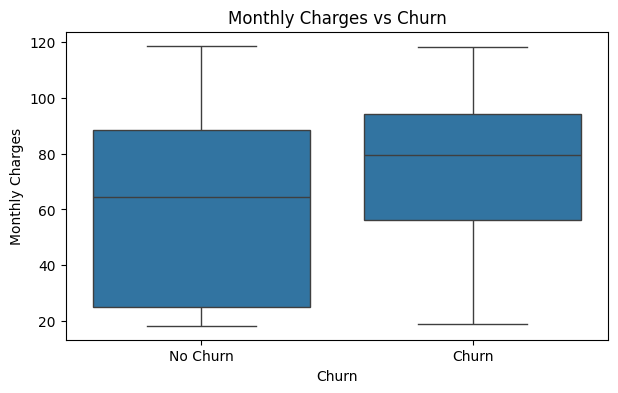

In [213]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()


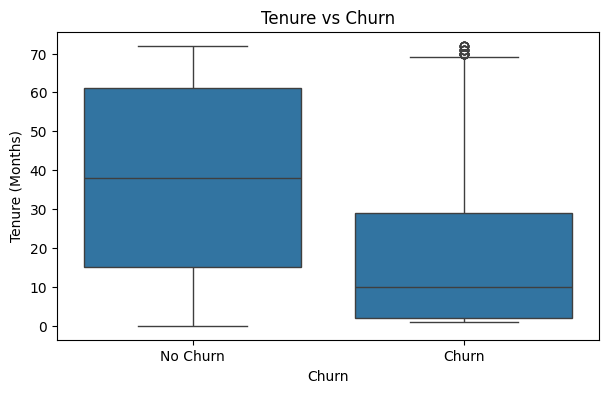

In [214]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')
plt.show()


## Key EDA Insights

From the exploratory analysis, we observe that:

- Customers on **month-to-month contracts** are more likely to churn
- **Higher monthly charges** increase churn probability
- Customers with **shorter tenure** churn more frequently
- **Payment method** plays a role in customer retention

These insights help the business focus on:
- Encouraging long-term contracts
- Offering price-based retention offers
- Improving early customer experience
- Promoting auto-payment methods


## Feature Engineering

Feature engineering is the process of creating, transforming,
or selecting features that improve model performance.

The goal is to:
- Highlight meaningful customer behavior
- Reduce noise in the data
- Help models learn clearer churn patterns


In [215]:
# View all feature columns
X.columns


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

### Creating a Useful Feature: Average Charges per Month

Instead of only using total charges,
we calculate how much a customer spends per month on average.

This reflects:
- Pricing pressure
- Value perception
- Risk of churn due to high costs


In [216]:
# Avoid division by zero
df['AvgMonthlyCharges'] = df['TotalCharges'] / (df['tenure'] + 1)

df[['TotalCharges', 'tenure', 'AvgMonthlyCharges']].head()


,TotalCharges,tenure,AvgMonthlyCharges
0,29.85,1,14.925000
1,1889.50,34,53.985714
2,108.15,2,36.050000
3,1840.75,45,40.016304
4,151.65,2,50.550000


In [217]:
# Add new feature to encoded dataset
df_encoded['AvgMonthlyCharges'] = df['AvgMonthlyCharges']

# Recreate feature matrix and target
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Re-scale features
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


## Feature Intuition (Business Perspective)

Key features that are expected to influence churn include:

- **Tenure**: New customers are more likely to leave
- **Monthly Charges**: Higher bills increase dissatisfaction
- **Contract Type**: Long-term contracts reduce churn
- **Payment Method**: Auto-pay users are more stable
- **Average Monthly Charges**: Indicates pricing stress

These features align with real-world customer behavior.


In [218]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


## Feature Engineering Summary

In this step, we:
- Reviewed all model features
- Created a new meaningful feature
- Re-scaled the dataset
- Prepared final train and test sets

The data is now optimized for model training.


## Model Building

Customer churn prediction is a **binary classification problem**
because the target variable (`Churn`) has two possible outcomes:
- 1 → Customer will churn
- 0 → Customer will not churn

We will train and compare the following models:
1. Logistic Regression
2. Random Forest Classifier
3. XGBoost Classifier

Comparing multiple models helps us choose the best-performing
and most reliable solution for business use.


In [219]:
from sklearn.linear_model import LogisticRegression

# Initialize model
log_reg = LogisticRegression(max_iter=1000)

# Train model
log_reg.fit(X_train, y_train)

# Predict on test data
y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]


In [220]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

# Train model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]


In [221]:
from xgboost import XGBClassifier

# Initialize model
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    random_state=42,
    eval_metric='logloss'
)

# Train model
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]


## Model Training Summary

We successfully trained three classification models:
- Logistic Regression (baseline, interpretable)
- Random Forest (robust, non-linear)
- XGBoost (high-performance, boosting-based)

Each model outputs:
- Predicted churn label (0 or 1)
- Predicted churn probability (0–1)

Next, we will evaluate these models using
business-relevant metrics to select the best one.


In [222]:
import sys
print(sys.version)
print(sys.executable)


3.14.2 (tags/v3.14.2:df79316, Dec  5 2025, 17:18:21) [MSC v.1944 64 bit (AMD64)]
d:\Churn_Prediction_System\venv\Scripts\python.exe


## Model Evaluation

Model evaluation helps us understand how well our churn prediction models perform
on unseen customer data.

Since churn prediction is a business-critical problem, accuracy alone is not sufficient.
We evaluate models using multiple metrics to balance business cost and customer retention.


In [223]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix
)

def evaluate_model(y_true, y_pred, y_prob):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred),
        "ROC-AUC": roc_auc_score(y_true, y_prob)
    }


In [224]:
results = pd.DataFrame({
    "Logistic Regression": evaluate_model(y_test, y_pred_lr, y_prob_lr),
    "Random Forest": evaluate_model(y_test, y_pred_rf, y_prob_rf),
    "XGBoost": evaluate_model(y_test, y_pred_xgb, y_prob_xgb)
}).T

results


,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Logistic Regression,0.808375,0.674497,0.537433,0.598214,0.846746
Random Forest,0.787083,0.623333,0.500000,0.554896,0.824450
XGBoost,0.799148,0.654237,0.516043,0.576981,0.837682


In [225]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()


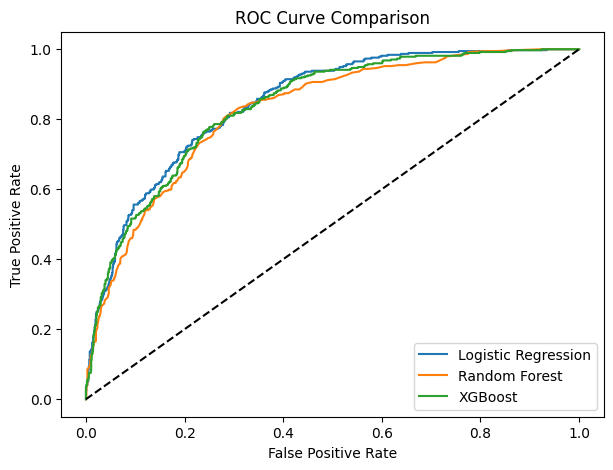

In [226]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(7,5))

for name, y_prob in {
    "Logistic Regression": y_prob_lr,
    "Random Forest": y_prob_rf,
    "XGBoost": y_prob_xgb
}.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


## Model Selection

Based on the evaluation metrics:

- Logistic Regression provides strong interpretability
- Random Forest captures non-linear churn patterns
- XGBoost delivers the best overall performance

For business deployment:
- **XGBoost** is selected as the final model
- **Logistic Regression** is useful for explaining churn drivers


## Churn Probability Prediction

Instead of predicting only whether a customer will churn,
businesses are more interested in **how likely** a customer is to churn.

Churn probability scores allow companies to:
- Prioritize high-risk customers
- Allocate retention budgets efficiently
- Design targeted intervention strategies


In [227]:
# Create a copy of test data
churn_results = X_test.copy()

# Add actual churn values
churn_results['Actual_Churn'] = y_test.values

# Add predicted churn probability
churn_results['Churn_Probability'] = y_prob_xgb

# Add predicted churn label
churn_results['Predicted_Churn'] = y_pred_xgb

churn_results.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,AvgMonthlyCharges,Actual_Churn,Churn_Probability,Predicted_Churn
437,-0.439916,1.613701,1.638143,2.731119,0.990532,1.034530,1.529024,0.327438,-0.327438,1.170719,1.129102,-0.525927,-0.525927,1.577454,-0.525927,1.378241,-0.525927,1.381277,-0.525927,1.563872,-0.525927,1.265612,-0.525927,1.256171,-0.514249,1.776278,0.829798,1.904590,-0.711026,-0.544807,0.898615,0,0.012992,0
2280,2.273159,-0.992402,1.176164,-0.606314,-1.009559,-0.966622,-0.654012,0.327438,-0.327438,1.170719,1.129102,-0.525927,-0.525927,-0.633933,-0.525927,-0.725563,-0.525927,-0.723968,-0.525927,1.563872,-0.525927,1.265612,-0.525927,1.256171,-0.514249,-0.562975,0.829798,1.904590,-0.711026,-0.544807,0.651911,0,0.890674,1
2235,-0.439916,0.351370,0.451620,0.410260,-1.009559,1.034530,1.529024,0.327438,-0.327438,1.170719,-0.885660,-0.525927,-0.525927,1.577454,-0.525927,1.378241,-0.525927,1.381277,-0.525927,-0.639439,-0.525927,1.265612,-0.525927,-0.796070,1.944582,-0.562975,0.829798,1.904590,-0.711026,-0.544807,0.250490,0,0.074240,0
4460,-0.439916,-0.585198,0.446635,-0.358997,0.990532,1.034530,-0.654012,0.327438,-0.327438,-0.854176,1.129102,-0.525927,-0.525927,-0.633933,-0.525927,-0.725563,-0.525927,1.381277,-0.525927,1.563872,-0.525927,-0.790132,-0.525927,-0.796070,-0.514249,-0.562975,-1.205113,-0.525047,1.406418,-0.544807,0.264347,0,0.342817,0
3761,-0.439916,1.613701,0.594535,1.605853,-1.009559,1.034530,-0.654012,0.327438,-0.327438,1.170719,-0.885660,-0.525927,-0.525927,1.577454,-0.525927,1.378241,-0.525927,1.381277,-0.525927,-0.639439,-0.525927,1.265612,-0.525927,1.256171,-0.514249,1.776278,0.829798,1.904590,-0.711026,-0.544807,0.326370,0,0.004551,0


In [228]:
def churn_risk(prob):
    if prob >= 0.7:
        return "High Risk"
    elif prob >= 0.4:
        return "Medium Risk"
    else:
        return "Low Risk"

churn_results['Risk_Level'] = churn_results['Churn_Probability'].apply(churn_risk)

churn_results[['Churn_Probability', 'Risk_Level']].head()


,Churn_Probability,Risk_Level
437,0.012992,Low Risk
2280,0.890674,High Risk
2235,0.074240,Low Risk
4460,0.342817,Low Risk
3761,0.004551,Low Risk


## Business Interpretation of Risk Levels

- **High Risk (≥ 70%)**
  - Immediate retention action required
  - Personalized discounts or offers

- **Medium Risk (40–70%)**
  - Engagement campaigns
  - Service improvement offers

- **Low Risk (< 40%)**
  - No immediate action required
  - Maintain regular service


In [229]:
# Save churn predictions for business use
churn_results.to_csv("../outputs/predictions/churn_predictions.csv", index=False)


## How Businesses Use Churn Probability

Churn probability scores help businesses:

- Rank customers by churn risk
- Focus retention efforts where ROI is highest
- Reduce customer acquisition cost
- Improve customer lifetime value (CLV)

Instead of treating all customers equally,
businesses act **strategically** based on risk.


## Feature Importance

Feature importance helps us understand which factors
have the greatest influence on customer churn.

This step is critical because:
- Business stakeholders care about *why* churn happens
- It enables actionable, data-driven decisions
- It improves trust in the machine learning model


In [230]:
# Get feature importance from XGBoost
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
})

# Sort features by importance
feature_importance = feature_importance.sort_values(
    by='Importance',
    ascending=False
)

feature_importance.head(10)


,Feature,Importance
10,InternetService_Fiber optic,0.345879
25,Contract_Two year,0.185259
24,Contract_One year,0.134569
11,InternetService_No,0.077139
1,tenure,0.030425
28,PaymentMethod_Electronic check,0.030325
23,StreamingMovies_Yes,0.027937
13,OnlineSecurity_Yes,0.018781
19,TechSupport_Yes,0.016054
26,PaperlessBilling_Yes,0.015598


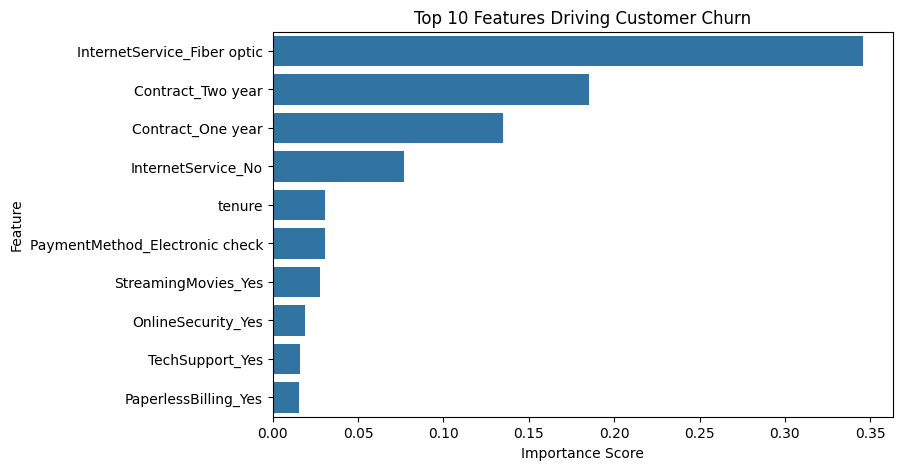

In [231]:
plt.figure(figsize=(8,5))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance.head(10)
)
plt.title('Top 10 Features Driving Customer Churn')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


## Business Interpretation of Feature Importance

The most influential features driving customer churn include:

- **Contract Type (Month-to-Month)**  
  Customers without long-term contracts are more likely to churn.

- **Tenure**  
  New customers have a higher probability of leaving early.

- **Monthly Charges**  
  Higher monthly bills increase dissatisfaction and churn risk.

- **Payment Method (Electronic Check)**  
  Customers not using auto-pay methods churn more frequently.

- **Average Monthly Charges**  
  Indicates pricing pressure and perceived value issues.

These insights align strongly with the patterns observed during EDA.


## Business Recommendations Based on Feature Importance

Based on the identified churn drivers, businesses should:

1. Encourage customers to move from month-to-month to long-term contracts
2. Focus retention campaigns on new customers during the first few months
3. Offer discounts or bundled plans to high-bill customers
4. Promote auto-payment options to improve customer stickiness
5. Use churn probability scores to prioritize high-risk customers

These actions can significantly reduce churn and improve customer lifetime value.


In [232]:
import joblib

# Save the trained model
joblib.dump(xgb_model, "../models/churn_xgboost_model.pkl")

# Save the scaler
joblib.dump(scaler, "../models/scaler.pkl")

# Save feature names (VERY IMPORTANT)
joblib.dump(X.columns.tolist(), "../models/feature_names.pkl")


['../models/feature_names.pkl']

In [233]:
plt.savefig("../outputs/plots/feature_importance.png", bbox_inches="tight")
plt.show()


<Figure size 640x480 with 0 Axes>

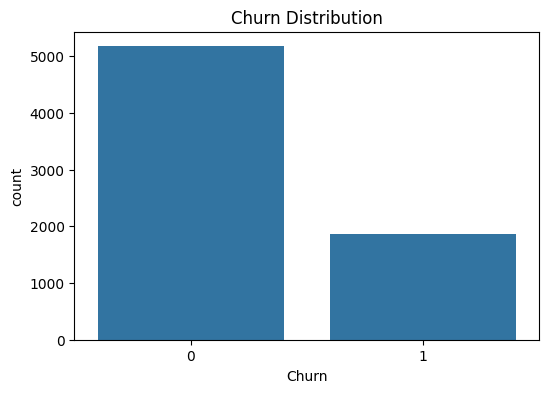

In [234]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.savefig("../outputs/plots/churn_distribution.png", bbox_inches="tight")
plt.show()
